In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:

import numpy as np
import pandas as pd
import math

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import seaborn as sns
matplotlib.rcParams['figure.dpi'] = 125

In [4]:
coeff = [1, -55, 1320, -18150, 157773, -902055, 3416930, -8409500, 12753576, -10628640, 3628800]
roots = np.roots(coeff)
print(roots)

[10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]


In [5]:
a_exp = list(np.arange(-10, 1, 0.5)) # consecutive numbers
a_vals = [0] + list(map(lambda x:pow(10, x), a_exp))
print(a_vals)

[0, 1e-10, 3.1622776601683795e-10, 1e-09, 3.1622776601683795e-09, 1e-08, 3.162277660168379e-08, 1e-07, 3.162277660168379e-07, 1e-06, 3.162277660168379e-06, 1e-05, 3.1622776601683795e-05, 0.0001, 0.00031622776601683794, 0.001, 0.0031622776601683794, 0.01, 0.03162277660168379, 0.1, 0.31622776601683794, 1.0, 3.1622776601683795]


In [6]:
coeff_ck = coeff[1:]
print(coeff_ck)

[-55, 1320, -18150, 157773, -902055, 3416930, -8409500, 12753576, -10628640, 3628800]


In [7]:
def perturb_coeff(a, coeff):
    coeff_perturbed = []
    for c_k in coeff:
        e_k = np.random.normal(0, 1) # mu = 0, sigma = 1
        coeff_perturbed.append(c_k*(1 + a*e_k))
    return coeff_perturbed

def dist(coeff_ck, new_coeff_ck):
    return [i - j for i, j in zip(new_coeff_ck, coeff_ck)]

def roots_perturb_coeff(perturb_coeff):
    perturb_coeff_full = [1] + perturb_coeff
    return np.roots(perturb_coeff_full)

def real_roots(roots):
    return list(roots.real[abs(roots.imag)<1e-5])

In [8]:
a_roots = []
for a in a_vals:
    trial_coeff = perturb_coeff(a, coeff_ck)
    trial_roots = roots_perturb_coeff(trial_coeff) # all roots
    a_roots.append(trial_roots)

a_roots_df = pd.DataFrame(a_roots)
a_roots_df.insert(0, 'a', a_vals)
a_roots_df.insert(0, 'a_exp', [float('-inf')] + a_exp)
#a_roots_df.insert(0, 'a_exp', [-math.inf] + a_exp)
a_roots_df.insert(0, 'a_rounded', a_roots_df['a'].round(2))
print(a_roots_df.shape)


(23, 13)


In [9]:

a_roots_df_melt = pd.melt(a_roots_df, id_vars=['a', 'a_exp', 'a_rounded'], var_name='roots', value_name='values')
a_roots_df_melt = a_roots_df_melt.sort_values(by=['a'])
a_roots_df_melt['real'] = a_roots_df_melt['values'].real
a_roots_df_melt['imaginary'] = a_roots_df_melt['values'].imag
a_roots_df_melt['modulus'] = np.sqrt(np.array(a_roots_df_melt['values'].real)**2+np.array(a_roots_df_melt['values'].imag)**2)
print(a_roots_df_melt.shape)
a_roots_df_melt.head(10)

(230, 8)


,a,a_exp,a_rounded,roots,values,real,imaginary,modulus
0,0.0,-inf,0.0,0,(9.99999999976065+0j),10.0,0.0,10.0
23,0.0,-inf,0.0,1,(9.000000001383428+0j),9.0,0.0,9.0
115,0.0,-inf,0.0,5,(5.000000001359408+0j),5.0,0.0,5.0
46,0.0,-inf,0.0,2,(7.9999999967098+0j),8.0,0.0,8.0
92,0.0,-inf,0.0,4,(5.999999996891773+0j),6.0,0.0,6.0
69,0.0,-inf,0.0,3,(7.000000004192445+0j),7.0,0.0,7.0
184,0.0,-inf,0.0,8,(1.9999999999973728+0j),2.0,0.0,2.0
161,0.0,-inf,0.0,7,(3.0000000000448317+0j),3.0,0.0,3.0
138,0.0,-inf,0.0,6,(3.9999999996602487+0j),4.0,0.0,4.0
207,0.0,-inf,0.0,9,(1.000000000000033+0j),1.0,0.0,1.0


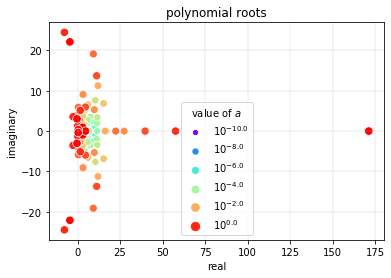

In [10]:
#a_roots_df_melt_nan = a_roots_df_melt.replace(-math.inf, -10.5) # np.nan, for legend to work
a_roots_df_melt_nan = a_roots_df_melt.replace(float('-inf'), np.nan)

cmap = 'rainbow'
#cmap = sns.color_palette('pastel', n_colors=22)
roots_plot = sns.scatterplot(x='real', y='imaginary', data=a_roots_df_melt_nan, 
                             hue='a_exp', size='a_exp', legend='full', palette=cmap)

handles, labels = roots_plot.get_legend_handles_labels()
display_labels = [{float(label)} for label in labels[1::4]]
roots_plot.legend(handles[1::4], ['$10^{}$'.format(label) for label in display_labels], title='value of $a$')
roots_plot.set_title('polynomial roots')

plt.grid(linestyle='-', linewidth=0.25)
plt.show()

In [11]:
real_avg = a_roots_df_melt.groupby('a_exp')['real'].mean().reset_index().rename(columns={'real':'real_avg'})
real_std = a_roots_df_melt.groupby('a_exp')['real'].std().reset_index().rename(columns={'real':'real_std'})
imag_avg = a_roots_df_melt.groupby('a_exp')['imaginary'].mean().reset_index().rename(columns={'imaginary':'imag_avg'})
imag_std = a_roots_df_melt.groupby('a_exp')['imaginary'].std().reset_index().rename(columns={'imaginary':'imag_std'})
max_modulus = a_roots_df_melt.groupby('a_exp')['modulus'].max().reset_index().rename(columns={'modulus':'max_modulus'})
a_roots_df_melt_stats = pd.concat([real_avg, real_std, imag_avg, imag_std], axis=1)
a_roots_df_melt_stats = a_roots_df_melt_stats.loc[:,~a_roots_df_melt_stats.columns.duplicated()]

a_roots_df_melt_stats_mod = pd.concat([real_avg, real_std, imag_avg, imag_std, max_modulus], axis=1)
a_roots_df_melt_stats_mod = a_roots_df_melt_stats_mod.loc[:,~a_roots_df_melt_stats_mod.columns.duplicated()]

print(a_roots_df_melt_stats.shape)

a_roots_df_melt_stats.head(10)
a_roots_df_melt_stats_mod.head(10)


(23, 5)


,a_exp,real_avg,real_std,imag_avg,imag_std,max_modulus
0,-inf,5.500000,3.027650,0.0,0.000000,10.000000
1,-10.0,5.500000,3.027650,0.0,0.000000,10.000010
2,-9.5,5.500000,3.027650,0.0,0.000000,9.999693
3,-9.0,5.500000,3.027650,0.0,0.000000,10.000483
4,-8.5,5.500000,3.027650,0.0,0.000000,9.994555
5,-8.0,5.500000,3.027650,0.0,0.000000,9.988012
6,-7.5,5.500000,3.027653,0.0,0.000000,10.017463
7,-7.0,5.500000,3.032196,0.0,0.165899,9.959696
8,-6.5,5.500000,3.085691,0.0,0.595760,9.802509
9,-6.0,5.500009,3.048296,0.0,0.353329,10.066846


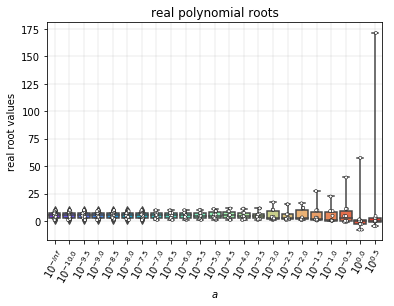

In [12]:

sns.stripplot(x='a_exp', y='values', data=a_roots_df_melt, size=3, color='white', linewidth=0.5, edgecolor='black')

#boxplot = sns.boxplot(x='a_rounded', y='values', data=a_roots_df_melt, whis=np.inf, palette='Set3')
boxplot = sns.boxplot(x='a_exp', y='values', data=a_roots_df_melt, whis=np.inf, palette='rainbow')
boxplot_xticklabels = boxplot.get_xticklabels()
display_xlabels = [{float(str(label.get_text()))} for label in boxplot_xticklabels]
boxplot.set_xticklabels(['$10^{}$'.format(label) for label in display_xlabels], rotation=60, horizontalalignment='center')

#boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=60, horizontalalignment='center')
boxplot.set(xlabel='$a$')
boxplot.set(ylabel='real root values')
boxplot.set(title='real polynomial roots')

plt.grid(linestyle='-', linewidth=0.25)
plt.show()

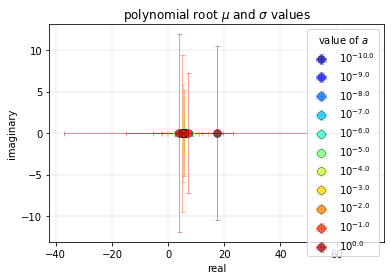

In [13]:
x, y = list(a_roots_df_melt_stats['real_avg']), list(a_roots_df_melt_stats['imag_avg'])
x_err, y_err = list(a_roots_df_melt_stats['real_std']), list(a_roots_df_melt_stats['imag_std'])
labels = list(a_roots_df_melt_stats['a_exp'])
float_labels = [{float(label)} for label in labels]
display_labels = ['$10^{}$'.format(label) for label in float_labels]

#plt.errorbar(x, y, yerr=y_err, xerr=x_err, elinewidth=0.5, capsize=2.5, ms=4, 
#             markerfacecolor='black', markeredgecolor='black', fmt='o', ecolor='blue')

n = len(x)
colors = pl.cm.jet(np.linspace(0,1,n))
for i in range(n):
    plt.errorbar(x[i], y[i], yerr=y_err[i], xerr=x_err[i], elinewidth=0.5, capsize=2.5, ms=8,
                 markerfacecolor=colors[i], markeredgecolor='black', markeredgewidth=0.5, 
                 fmt='o', ecolor=colors[i], alpha=0.75,
                 label='_nolegend_' if (i+1)%2 != 0 else display_labels[i]) #label=display_labels[i]
    
plt.xlabel('real')
plt.ylabel('imaginary')
plt.title('polynomial root $\mu$ and $\sigma$ values') # mean and standard deviations of roots by 'a' value
plt.grid(linestyle='-', linewidth=0.25)
plt.legend(title='value of $a$')
plt.show()

In [14]:
stats_melt= pd.melt(a_roots_df_melt_stats, id_vars='a_exp', var_name='statistic', value_name='val')
print(stats_melt.shape)
stats_melt.head()
stats_melt_mod = pd.melt(a_roots_df_melt_stats_mod, id_vars='a_exp', var_name='statistic', value_name='val')
print(stats_melt_mod.shape)
stats_melt_mod.head()

(92, 3)
(115, 3)


,a_exp,statistic,val
0,-inf,real_avg,5.5
1,-10.0,real_avg,5.5
2,-9.5,real_avg,5.5
3,-9.0,real_avg,5.5
4,-8.5,real_avg,5.5


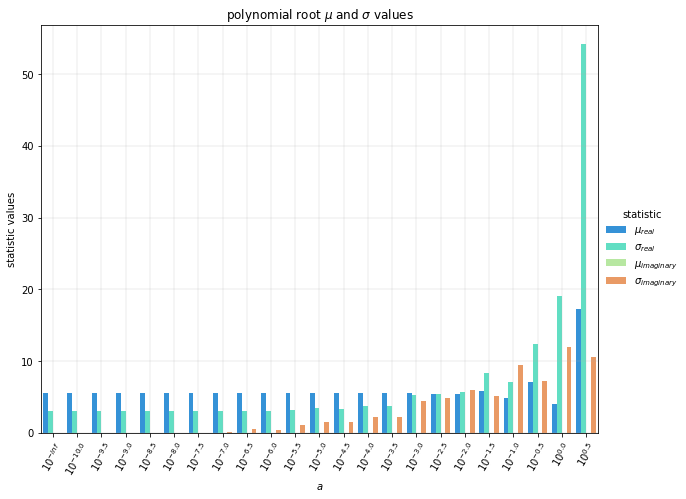

In [15]:
# for legend
stats_melt = stats_melt.replace('real_avg', '$\mu_{real}$')
stats_melt = stats_melt.replace('real_std', '$\sigma_{real}$')
stats_melt = stats_melt.replace('imag_avg', '$\mu_{imaginary}$')
stats_melt = stats_melt.replace('imag_std', '$\sigma_{imaginary}$')

# 'boxplot/display_xticklabels' because 'FacetGrid' object has no attribute 'get_xticklabels' 
barplot = sns.catplot(x='a_exp', y='val', hue='statistic', data=stats_melt, 
                      kind='bar', palette='rainbow', height=6.4, aspect=4/3)
barplot.set_xticklabels(['$10^{}$'.format(label) for label in display_xlabels], rotation=60, horizontalalignment='center')
barplot.set(xlabel='$a$')
barplot.set(ylabel='statistic values')
barplot.set(title='polynomial root $\mu$ and $\sigma$ values')

sns.despine(top=False, right=False)
plt.grid(linestyle='-', linewidth=0.25)
plt.show()

In [16]:
stats_melt_mod = pd.melt(a_roots_df_melt_stats_mod, id_vars='a_exp', var_name='statistic', value_name='max')
print(stats_melt_mod.shape)
stats_melt_mod.head(115)

(115, 3)


,a_exp,statistic,max
0,-inf,real_avg,5.500000
1,-10.0,real_avg,5.500000
2,-9.5,real_avg,5.500000
3,-9.0,real_avg,5.500000
4,-8.5,real_avg,5.500000
5,-8.0,real_avg,5.500000
6,-7.5,real_avg,5.500000
7,-7.0,real_avg,5.500000
8,-6.5,real_avg,5.500000
9,-6.0,real_avg,5.500009


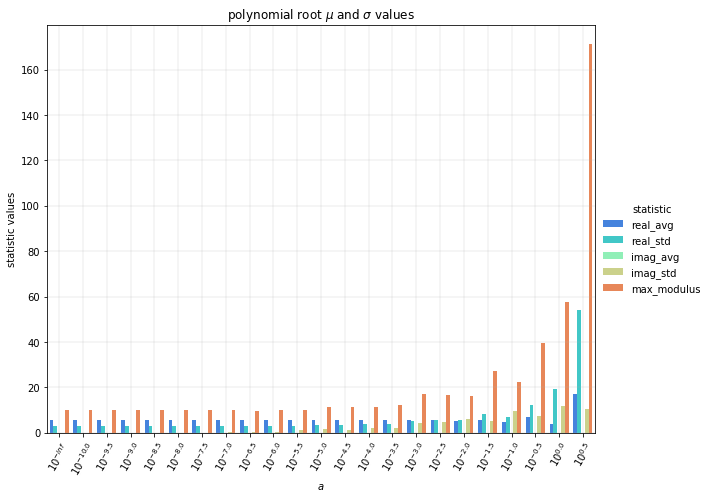

In [17]:
stats_melt = stats_melt.replace('real_avg', '$\mu_{real}$')
stats_melt = stats_melt.replace('real_std', '$\sigma_{real}$')
stats_melt = stats_melt.replace('imag_avg', '$\mu_{imaginary}$')
stats_melt = stats_melt.replace('imag_std', '$\sigma_{imaginary}$')


# 'boxplot/display_xticklabels' because 'FacetGrid' object has no attribute 'get_xticklabels' 
barplot = sns.catplot(x='a_exp', y='max', hue='statistic', data=stats_melt_mod, 
                      kind='bar', palette='rainbow', height=6.4, aspect=4/3)
barplot.set_xticklabels(['$10^{}$'.format(label) for label in display_xlabels], rotation=60, horizontalalignment='center')
barplot.set(xlabel='$a$')
barplot.set(ylabel='statistic values')
barplot.set(title='polynomial root $\mu$ and $\sigma$ values')

sns.despine(top=False, right=False)
plt.grid(linestyle='-', linewidth=0.25)
plt.show()

In [48]:
def multiple_trials(n):
    for i in range(n):
        a_roots = []
        a_exp = list(np.arange(-10, -2, 0.5)) # consecutive numbers
        a_vals = [0] + list(map(lambda x:pow(10, x), a_exp))
        for a in a_vals:
            trial_coeff = perturb_coeff(a, coeff_ck)
            trial_roots = roots_perturb_coeff(trial_coeff) # all roots
            a_roots.append(trial_roots)
        a_roots_df = pd.DataFrame(a_roots)
        a_roots_df.insert(0, 'a', a_vals)
        a_roots_df.insert(0, 'a_exp', [float('-inf')] + a_exp)
        #a_roots_df.insert(0, 'a_exp', [-math.inf] + a_exp)
        a_roots_df.insert(0, 'a_rounded', a_roots_df['a'].round(2))
        real_avg = a_roots_df_melt.groupby('a_exp')['real'].mean().reset_index().rename(columns={'real':'real_avg'})
        real_std = a_roots_df_melt.groupby('a_exp')['real'].std().reset_index().rename(columns={'real':'real_std'})
        imag_avg = a_roots_df_melt.groupby('a_exp')['imaginary'].mean().reset_index().rename(columns={'imaginary':'imag_avg'})
        imag_std = a_roots_df_melt.groupby('a_exp')['imaginary'].std().reset_index().rename(columns={'imaginary':'imag_std'})
        max_modulus = a_roots_df_melt.groupby('a_exp')['modulus'].max().reset_index().rename(columns={'modulus':'max_modulus'})
        min_modulus = a_roots_df_melt.groupby('a_exp')['modulus'].min().reset_index().rename(columns={'modulus':'min_modulus'})

        a_roots_df_melt_stats = pd.concat([real_avg, real_std, imag_avg, imag_std], axis=1)
        a_roots_df_melt_stats = a_roots_df_melt_stats.loc[:,~a_roots_df_melt_stats.columns.duplicated()]

        a_roots_df_melt_stats_mod = pd.concat([real_avg, real_std, imag_avg, imag_std, max_modulus, min_modulus], axis=1)
        a_roots_df_melt_stats_mod = a_roots_df_melt_stats_mod.loc[:,~a_roots_df_melt_stats_mod.columns.duplicated()]
        x, y = list(a_roots_df_melt_stats['real_avg']), list(a_roots_df_melt_stats['imag_avg'])
        x_err, y_err = list(a_roots_df_melt_stats['real_std']), list(a_roots_df_melt_stats['imag_std'])
        labels = list(a_roots_df_melt_stats['a_exp'])
        float_labels = [{float(label)} for label in labels]
        display_labels = ['$10^{}$'.format(label) for label in float_labels]
        stats_melt= pd.melt(a_roots_df_melt_stats, id_vars='a_exp', var_name='statistic', value_name='val')
        print(stats_melt.shape)
        stats_melt.head()
        stats_melt_mod = pd.melt(a_roots_df_melt_stats_mod, id_vars='a_exp', var_name='statistic', value_name='val')
        barplot = sns.catplot(x='a_exp', y='val', hue='statistic', data=stats_melt_mod, 
                      kind='bar', palette='rainbow', height=6.4, aspect=4/3)
        barplot.set_xticklabels(['$10^{}$'.format(label) for label in display_xlabels], rotation=60, horizontalalignment='center')
        barplot.set(xlabel='$a$')
        barplot.set(ylabel='statistic values')
        barplot.set(title='polynomial root $\mu$ and $\sigma$ values')

        sns.despine(top=False, right=False)
        plt.grid(linestyle='-', linewidth=0.25)
        plt.show()


    

(92, 3)


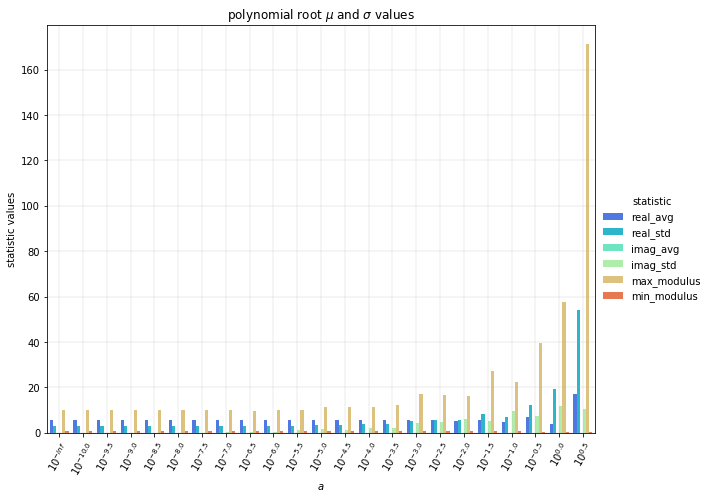

(92, 3)


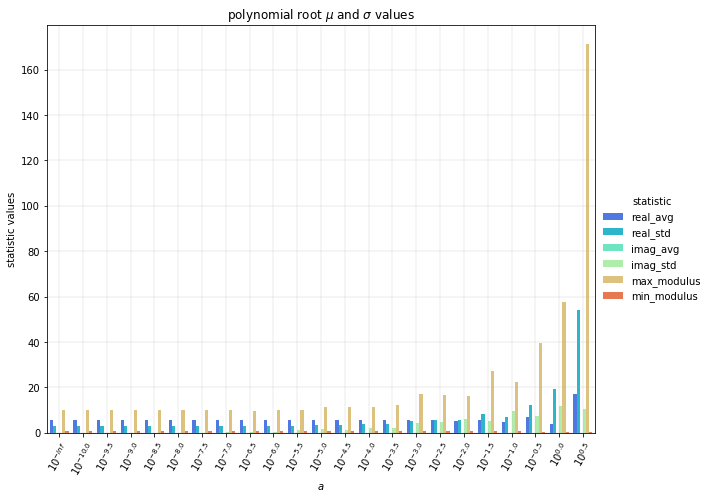

(92, 3)


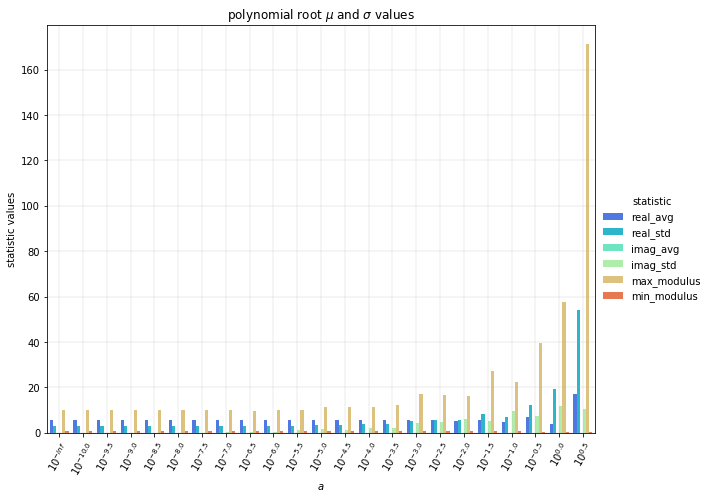

(92, 3)


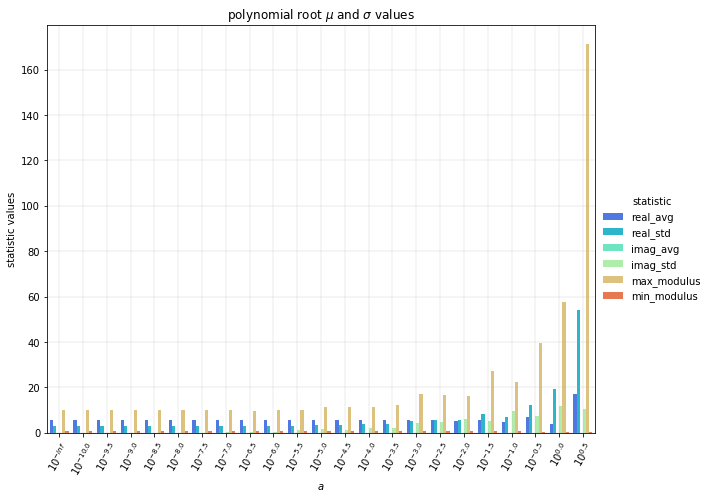

(92, 3)


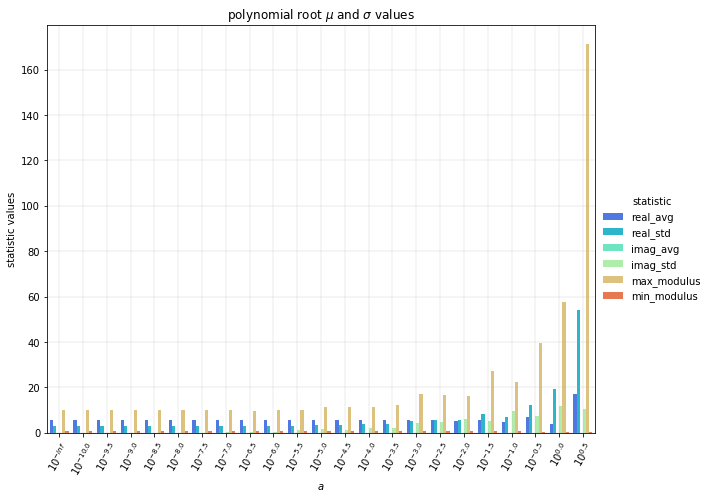

In [49]:
multiple_trials(5)